In [8]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
data = pd.read_csv('trustpilot_starbucks.csv')

In [ ]:
# Remove URLs
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print(data['text'])

16    [order, adida, stan, smith, receiv, reebok, sh...
4     [product, top, world, custom, servic, size, gu...
7     [websit, anxieti, comment, im, app, tri, add, ...
19    [would, give, minusstar, rate, could, exchang,...
9                                                    []
19    [would, give, minusstar, rate, could, exchang,...
5     [3, week, sinc, reciv, item, return, refund, y...
4     [product, top, world, custom, servic, size, gu...
1     [big, fan, adida, life, still, love, style, un...
14    [tri, place, order, onlin, submit, order, said...
Name: stemmed_tokens, dtype: object
7     [website, anxiety, comment, im, app, trying, a...
1     [big, fan, adidas, life, still, love, style, u...
1     [big, fan, adidas, life, still, love, style, u...
20    [scampromoting, raffle, event, expect, nothing...
20    [scampromoting, raffle, event, expect, nothing...
0     [great, product, expensive, great, product, ho...
4     [product, top, world, customer, service, size,...
12    [pleas

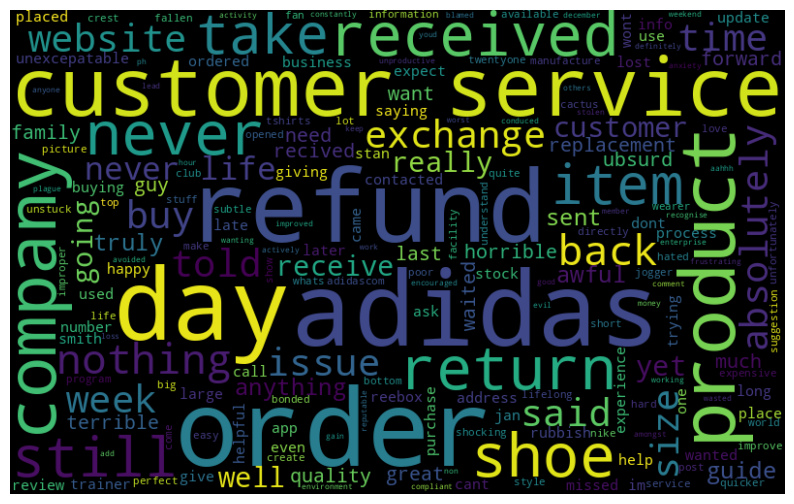

In [ ]:

# Convert text to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())

# Tokenize the text data
data['tokenized_text'] = data['text'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))

data['filtered_tokens'] = data['tokenized_text'].apply(lambda x: [token for token in x if token not in stop_words])

stemmer = SnowballStemmer('english')

data['stemmed_tokens'] = data['filtered_tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

# Display a sample of the stemmed data
print(data['stemmed_tokens'].sample(min(10, len(data)), replace=True))

lemmatizer = WordNetLemmatizer()

data['lemmatized_tokens'] = data['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# Display a sample of the lemmatized data
print(data['lemmatized_tokens'].sample(min(10, len(data)), replace=True))

all_words = ' '.join([word for tokens in data['lemmatized_tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

data.to_csv('cleaned_trustpilot_adidas_reviews.csv', index=False)